In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_Transient_NS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H2.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.18 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/Gasket Leak/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df1 = pd.concat(all_data, axis=1, ignore_index=True)

df1["LeakType"] = "Gasket Leak"
df1.head()

0       1       2        3     4      5     6       7       8  \
0      0.0     0.0     0.0      0.0     0    0.0     0     0.0     0.0   
1  19352.0 -6370.0 -7168.0  10979.0  2207  529.0 -5427 -1840.0 -5545.0   
2      0.0     0.0     0.0      0.0     0    0.0     0     0.0     0.0   
3  19323.0 -6417.0 -7127.0  10934.0  2141  236.0 -5736 -1907.0 -5540.0   
4      0.0     0.0     0.0      0.0     0    0.0     0     0.0     0.0   

        9      10       11     LeakType  
0     0.0     0.0      0.0  Gasket Leak  
1  3047.0  7654.0 -11281.0  Gasket Leak  
2     0.0     0.0      0.0  Gasket Leak  
3  3018.0  7437.0 -11366.0  Gasket Leak  
4     0.0     0.0      0.0  Gasket Leak

In [5]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/Circumferential Crack/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df2 = pd.concat(all_data, axis=1, ignore_index=True)

df2["LeakType"] = "Circumferential Crack"
df2.head()

0       1       2      3       4        5       6       7     8  \
0    0.0     0.0     0.0      0     0.0      0.0     0.0     0.0     0   
1 -821.0 -4482.0  2524.0 -10967  3050.0  11209.0  1567.0 -7816.0  7045   
2    0.0     0.0     0.0      0     0.0      0.0     0.0     0.0     0   
3 -925.0 -4362.0  2560.0 -11074  3104.0  11301.0  1555.0 -7832.0  7050   
4    0.0     0.0     0.0      0     0.0      0.0     0.0     0.0     0   

        9      10       11               LeakType  
0     0.0     0.0      0.0  Circumferential Crack  
1  3493.0 -3274.0  10598.0  Circumferential Crack  
2     0.0     0.0      0.0  Circumferential Crack  
3  3410.0 -3079.0  10547.0  Circumferential Crack  
4     0.0     0.0      0.0  Circumferential Crack

In [6]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/Longitudinal Crack/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df3 = pd.concat(all_data, axis=1, ignore_index=True)

df3["LeakType"] = "Longitudinal Crack"
df3.head()

0       1    2       3       4       5       6       7       8  \
0     0.0     0.0    0     0.0     0.0     0.0     0.0     0.0     0.0   
1  3119.0  8020.0 -231  7918.0 -3936.0  1041.0  3735.0 -1288.0 -8645.0   
2     0.0     0.0    0     0.0     0.0     0.0     0.0     0.0     0.0   
3  3052.0  8167.0 -157  7967.0 -4017.0   982.0  3776.0 -1320.0 -8615.0   
4     0.0     0.0    0     0.0     0.0     0.0     0.0     0.0     0.0   

         9      10    11            LeakType  
0      0.0     0.0     0  Longitudinal Crack  
1 -15102.0 -1625.0 -3713  Longitudinal Crack  
2      0.0     0.0     0  Longitudinal Crack  
3 -15160.0 -1708.0 -3940  Longitudinal Crack  
4      0.0     0.0     0  Longitudinal Crack

In [7]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/NonLeak/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df4 = pd.concat(all_data, axis=1, ignore_index=True)

df4["LeakType"] = "NonLeak"
df4.head()

0       1       2     3        4     5        6       7       8  \
0     0.0     0.0     0.0     0      0.0     0      0.0     0.0     0.0   
1 -4302.0 -2562.0 -4640.0  1172  10618.0  1570 -15452.0  2668.0 -4011.0   
2     0.0     0.0     0.0     0      0.0     0      0.0     0.0     0.0   
3 -4277.0 -2608.0 -4494.0  1234  10563.0  1552 -15743.0  2812.0 -3939.0   
4     0.0     0.0     0.0     0      0.0     0      0.0     0.0     0.0   

        9      10      11 LeakType  
0     0.0     0.0     0.0  NonLeak  
1  1414.0 -1954.0  5828.0  NonLeak  
2     0.0     0.0     0.0  NonLeak  
3  1489.0 -1551.0  5655.0  NonLeak  
4     0.0     0.0     0.0  NonLeak

In [8]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/Orifice Leak/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df5 = pd.concat(all_data, axis=1, ignore_index=True)

df5["LeakType"] = "Orifice Leak"
df5.head()

0       1       2     3       4       5     6      7     8       9  \
0     0     0.0     0.0   0.0     0.0     0.0   0.0    0.0   0.0     0.0   
1  3666  7506.0 -2422.0 -82.0  3903.0  4035.0  59.0 -615.0  67.0 -1974.0   
2     0     0.0     0.0   0.0     0.0     0.0   0.0    0.0   0.0     0.0   
3  3661  7390.0 -2361.0 -53.0  3757.0  4323.0  38.0 -596.0  60.0 -1910.0   
4     0     0.0     0.0   0.0     0.0     0.0   0.0    0.0   0.0     0.0   

     10      11      LeakType  
0     0     0.0  Orifice Leak  
1 -2464 -2864.0  Orifice Leak  
2     0     0.0  Orifice Leak  
3 -2437 -2802.0  Orifice Leak  
4     0     0.0  Orifice Leak

In [9]:
df5.tail(10)

0   1   2   3   4   5   6   7   8   9    10  11      LeakType
592910     0 NaN NaN NaN NaN NaN NaN NaN NaN NaN     0 NaN  Orifice Leak
592911  1228 NaN NaN NaN NaN NaN NaN NaN NaN NaN -1934 NaN  Orifice Leak
592912     0 NaN NaN NaN NaN NaN NaN NaN NaN NaN     0 NaN  Orifice Leak
592913  1102 NaN NaN NaN NaN NaN NaN NaN NaN NaN -1887 NaN  Orifice Leak
592914     0 NaN NaN NaN NaN NaN NaN NaN NaN NaN     0 NaN  Orifice Leak
592915   978 NaN NaN NaN NaN NaN NaN NaN NaN NaN -1841 NaN  Orifice Leak
592916     0 NaN NaN NaN NaN NaN NaN NaN NaN NaN     0 NaN  Orifice Leak
592917   863 NaN NaN NaN NaN NaN NaN NaN NaN NaN -1805 NaN  Orifice Leak
592918     0 NaN NaN NaN NaN NaN NaN NaN NaN NaN     0 NaN  Orifice Leak
592919   769 NaN NaN NaN NaN NaN NaN NaN NaN NaN -1757 NaN  Orifice Leak

In [10]:
data = pd.concat([df1, df2, df3, df4, df5], axis=0)
data

0       1       2        3       4      5       6       7  \
0           0.0     0.0     0.0      0.0     0.0    0.0     0.0     0.0   
1       19352.0 -6370.0 -7168.0  10979.0  2207.0  529.0 -5427.0 -1840.0   
2           0.0     0.0     0.0      0.0     0.0    0.0     0.0     0.0   
3       19323.0 -6417.0 -7127.0  10934.0  2141.0  236.0 -5736.0 -1907.0   
4           0.0     0.0     0.0      0.0     0.0    0.0     0.0     0.0   
...         ...     ...     ...      ...     ...    ...     ...     ...   
592915    978.0     NaN     NaN      NaN     NaN    NaN     NaN     NaN   
592916      0.0     NaN     NaN      NaN     NaN    NaN     NaN     NaN   
592917    863.0     NaN     NaN      NaN     NaN    NaN     NaN     NaN   
592918      0.0     NaN     NaN      NaN     NaN    NaN     NaN     NaN   
592919    769.0     NaN     NaN      NaN     NaN    NaN     NaN     NaN   

             8       9      10       11      LeakType  
0          0.0     0.0     0.0      0.0   Gasket Leak  
1      -5545.0  3047.0  7654.0 -11281.0   Gasket Leak  
2          0.0     0.0     0.0      0.0   Gasket Leak  
3      -5540.0  3018.0  7437.0 -11366.0   Gasket Leak  
4          0.0     0.0     0.0      0.0   Gasket Leak  
...        ...     ...     ...      ...           ...  
592915     NaN     NaN -1841.0      NaN  Orifice Leak  
592916     NaN     NaN     0.0      NaN  Orifice Leak  
592917     NaN     NaN -1805.0      NaN  Orifice Leak  
592918     NaN     NaN     0.0      NaN  Orifice Leak  
592919     NaN     NaN -1757.0      NaN  Orifice Leak  

[3136600 rows x 13 columns]

In [11]:
data= data.sample(frac=1,random_state=55)
data

0        1        2        3       4       5       6       7  \
86843  -1445.0    -65.0   1852.0   1556.0 -7924.0  -219.0  3695.0  1699.0   
246052     0.0      0.0      0.0      0.0     0.0     0.0     0.0     0.0   
11099   1214.0  -3744.0 -10412.0  -1008.0 -6519.0   527.0 -1946.0  2654.0   
427162     0.0      0.0      0.0      0.0     0.0     0.0     0.0     0.0   
483511  3087.0   6478.0  -9511.0  11253.0  7234.0  1889.0  -277.0 -6411.0   
...        ...      ...      ...      ...     ...     ...     ...     ...   
403429  1046.0   8057.0  11484.0  -2590.0 -6506.0 -8956.0  3403.0  5119.0   
193337  4877.0  -5398.0   6915.0  -3297.0 -7621.0  1379.0 -3086.0 -9729.0   
130573  5906.0 -15403.0   1305.0    668.0 -7955.0  -546.0 -3114.0 -5776.0   
526044     0.0      0.0      0.0      0.0     0.0     0.0     0.0     0.0   
191817 -6136.0  -9631.0   2075.0  -8909.0  5010.0  4444.0 -9497.0 -3943.0   

              8       9      10      11               LeakType  
86843     603.0   164.0 -2167.0 -3595.0                NonLeak  
246052      0.0     0.0     0.0     0.0           Orifice Leak  
11099    4594.0 -2927.0 -7851.0 -6621.0                NonLeak  
427162      0.0     0.0     0.0     0.0           Orifice Leak  
483511  -2716.0 -1927.0 -5257.0  2411.0            Gasket Leak  
...         ...     ...     ...     ...                    ...  
403429   6863.0 -1487.0 -3884.0 -3507.0            Gasket Leak  
193337   7999.0  2093.0  5832.0 -8732.0     Longitudinal Crack  
130573  -4829.0 -5759.0  1030.0 -2257.0                NonLeak  
526044      0.0     0.0     0.0     0.0  Circumferential Crack  
191817  12410.0   524.0  4500.0  2557.0     Longitudinal Crack  

[3136600 rows x 13 columns]

In [12]:
data['LeakType'].unique()

array(['NonLeak', 'Orifice Leak', 'Gasket Leak', 'Longitudinal Crack',
       'Circumferential Crack'], dtype=object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136600 entries, 86843 to 191817
Data columns (total 13 columns):
 #   Column    Dtype  
---  ------    -----  
 0   0         float64
 1   1         float64
 2   2         float64
 3   3         float64
 4   4         float64
 5   5         float64
 6   6         float64
 7   7         float64
 8   8         float64
 9   9         float64
 10  10        float64
 11  11        float64
 12  LeakType  object 
dtypes: float64(12), object(1)
memory usage: 335.0+ MB


In [14]:
data.isna().sum()

0           149000
1           224000
2           177000
3            65500
4           145000
5           108000
6           157000
7           188000
8           115500
9           188500
10          200000
11          200500
LeakType         0
dtype: int64

In [15]:
data = data.dropna(axis=0)
data.isna().sum()

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
LeakType    0
dtype: int64

In [16]:
data.nunique()

0           50936
1           42721
2           40960
3           34005
4           47610
5           43860
6           43731
7           52553
8           43383
9           37139
10          48198
11          40179
LeakType        5
dtype: int64

In [17]:
data.describe()

0             1             2             3             4  \
count  2.885100e+06  2.885100e+06  2.885100e+06  2.885100e+06  2.885100e+06   
mean   1.099951e+01  7.375364e+00  5.780630e+00  4.531074e+00  4.365190e+00   
std    4.468559e+03  4.124403e+03  4.452625e+03  3.399102e+03  4.973353e+03   
min   -3.276800e+04 -3.276800e+04 -2.476000e+04 -2.233200e+04 -3.276800e+04   
25%    0.000000e+00  0.000000e+00  0.000000e+00 -8.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.400000e+01  2.200000e+01  5.000000e+00  0.000000e+00  2.900000e+01   
max    3.276700e+04  3.276700e+04  2.625300e+04  2.143100e+04  3.276700e+04   

                  5             6             7             8             9  \
count  2.885100e+06  2.885100e+06  2.885100e+06  2.885100e+06  2.885100e+06   
mean   1.133048e+01  5.321903e+00  1.344541e+00  5.307662e+00  9.084438e+00   
std    4.522886e+03  4.391047e+03  4.713427e+03  4.256850e+03  3.880505e+03   
min   -3.276800e+04 -3.276800e+04 -3.276800e+04 -3.276800e+04 -2.381100e+04   
25%    0.000000e+00  0.000000e+00  0.000000e+00 -1.800000e+01 -9.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.100000e+01  1.200000e+01  1.500000e+01  0.000000e+00  0.000000e+00   
max    3.276700e+04  3.276700e+04  3.276700e+04  3.276700e+04  2.358800e+04   

                 10            11  
count  2.885100e+06  2.885100e+06  
mean   1.004977e+00  6.510090e+00  
std    4.268296e+03  4.059965e+03  
min   -3.276800e+04 -3.276800e+04  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    1.400000e+01  3.300000e+01  
max    3.276700e+04  3.276700e+04

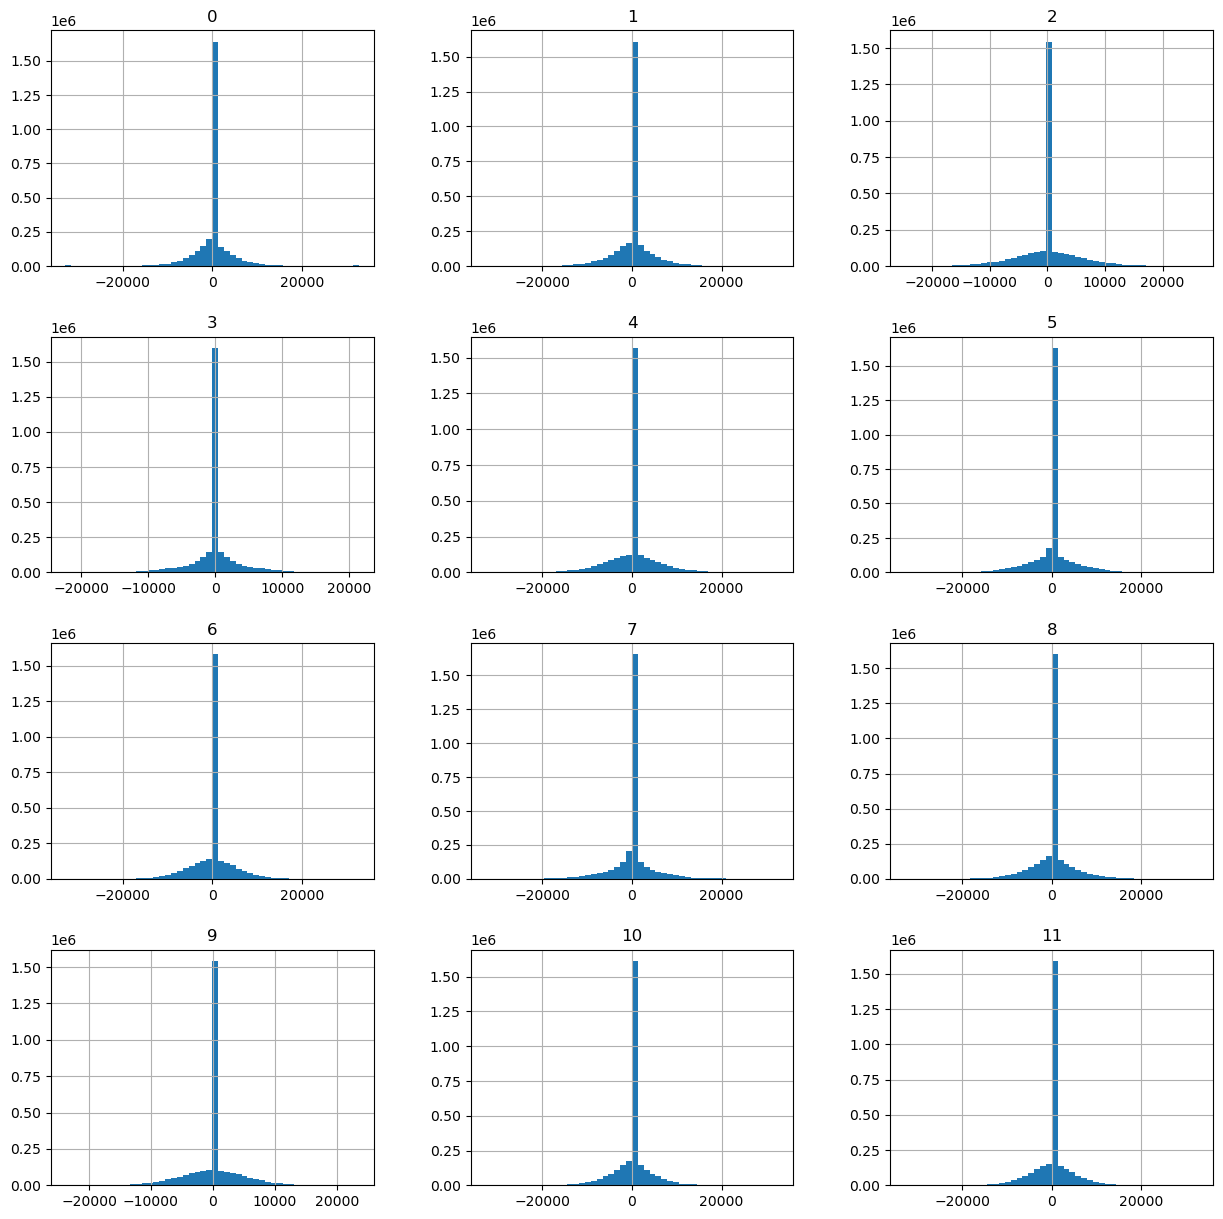

In [18]:
data.hist(bins=50, figsize=(15,15))
plt.show()

In [19]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(2885100, 13)
(1442555, 13)


In [20]:
label_encoder = LabelEncoder()
data['category_label_encoded'] = label_encoder.fit_transform(data['LeakType'])
data.head()

0       1        2        3       4        5       6       7  \
86843  -1445.0   -65.0   1852.0   1556.0 -7924.0   -219.0  3695.0  1699.0   
246052     0.0     0.0      0.0      0.0     0.0      0.0     0.0     0.0   
11099   1214.0 -3744.0 -10412.0  -1008.0 -6519.0    527.0 -1946.0  2654.0   
483511  3087.0  6478.0  -9511.0  11253.0  7234.0   1889.0  -277.0 -6411.0   
181657  9675.0    37.0   6575.0  -1812.0  1961.0  14951.0 -6604.0  -168.0   

             8       9      10      11      LeakType  category_label_encoded  
86843    603.0   164.0 -2167.0 -3595.0       NonLeak                       3  
246052     0.0     0.0     0.0     0.0  Orifice Leak                       4  
11099   4594.0 -2927.0 -7851.0 -6621.0       NonLeak                       3  
483511 -2716.0 -1927.0 -5257.0  2411.0   Gasket Leak                       1  
181657  -724.0 -8992.0   631.0  -104.0  Orifice Leak                       4

In [21]:
data.sample(10)

0       1        2        3        4       5        6       7  \
152907  -523.0  4328.0   7778.0  10976.0  -6221.0 -7859.0  -2088.0 -2301.0   
59559  -4931.0  7307.0   6617.0    717.0  14570.0 -5072.0 -20915.0   994.0   
318623 -3627.0  -715.0   1172.0   3314.0  -5879.0 -3809.0   1996.0 -3027.0   
110821  6916.0  1854.0   -154.0  -1962.0   8823.0 -7134.0  -9175.0 -2839.0   
56249  -3148.0  1338.0  -6123.0    111.0   2537.0 -2638.0  -2254.0  5159.0   
261015 -5309.0 -8175.0   -673.0  -1005.0  18003.0   572.0   4100.0   124.0   
201041 -4941.0  3184.0   6283.0  -1720.0  -3942.0 -1499.0  -6165.0  -739.0   
507157 -7825.0  4105.0 -20109.0   2820.0  -1676.0 -8568.0  -2251.0  7301.0   
423143 -1085.0   313.0    739.0   3385.0  -3753.0  1345.0    662.0  -395.0   
282207  6404.0   656.0  -7761.0   4943.0   4769.0  2789.0  -8033.0 -1925.0   

             8       9      10       11               LeakType  \
152907 -4980.0  5255.0 -4087.0  -7407.0  Circumferential Crack   
59559   4941.0 -1472.0 -6911.0   4739.0            Gasket Leak   
318623 -2396.0  3968.0  -840.0   1888.0           Orifice Leak   
110821  1708.0  5546.0  2627.0  -5248.0            Gasket Leak   
56249   2963.0 -3813.0 -5469.0    633.0  Circumferential Crack   
261015  2724.0   667.0  1766.0   1908.0                NonLeak   
201041 -8247.0  2918.0 -4316.0  -2191.0                NonLeak   
507157  3430.0 -2972.0  4923.0  18353.0     Longitudinal Crack   
423143 -3653.0  8929.0 -5055.0   3277.0                NonLeak   
282207 -9291.0 -2866.0  1912.0   -865.0     Longitudinal Crack   

        category_label_encoded  
152907                       0  
59559                        1  
318623                       4  
110821                       1  
56249                        0  
261015                       3  
201041                       3  
507157                       2  
423143                       3  
282207                       2

In [22]:
X = data.drop(['LeakType', 'category_label_encoded'], axis=1)  # Features
y = data['category_label_encoded']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y

86843     3
246052    4
11099     3
483511    1
181657    4
         ..
420055    2
403429    1
193337    2
130573    3
191817    2
Name: category_label_encoded, Length: 1442555, dtype: int64

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Build DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Output layer, 5 for the number of unique categories

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Train model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_data=(X_test_scaled, y_test))
model.summary()

Epoch 1/20
72128/72128 [==============================] - 203s 3ms/step - loss: 0.3724 - accuracy: 0.8629 - val_loss: 0.3114 - val_accuracy: 0.8832
Epoch 2/20
72128/72128 [==============================] - 187s 3ms/step - loss: 0.2974 - accuracy: 0.8895 - val_loss: 0.2798 - val_accuracy: 0.8964
Epoch 3/20
72128/72128 [==============================] - 180s 2ms/step - loss: 0.2789 - accuracy: 0.8962 - val_loss: 0.2779 - val_accuracy: 0.8977
Epoch 4/20
72128/72128 [==============================] - 184s 3ms/step - loss: 0.2688 - accuracy: 0.9005 - val_loss: 0.2649 - val_accuracy: 0.9020
Epoch 5/20
72128/72128 [==============================] - 188s 3ms/step - loss: 0.2628 - accuracy: 0.9024 - val_loss: 0.2599 - val_accuracy: 0.9036
Epoch 6/20
72128/72128 [==============================] - 185s 3ms/step - loss: 0.2579 - accuracy: 0.9042 - val_loss: 0.2522 - val_accuracy: 0.9066
Epoch 7/20
72128/72128 [==============================] - 200s 3ms/step - loss: 0.2544 - accuracy: 0.9055 - val_

In [28]:
model.save("hydrophone-looped_model.h5")
print('ok')

ok


In [27]:

sample_inputs = X_test_scaled[:10]

predictions = model.predict(sample_inputs)

# Get the index of the predicted classes
predicted_classes = predictions.argmax(axis=1)

# Map the index of classes to the original leak types using the class_labels list
predicted_leak_types = label_encoder.inverse_transform(predicted_classes)

# Print the index and the corresponding leak types for the first 10 data points
for index in range(10):
    # Get the index and the corresponding leak type
    leak_type_index = predicted_classes[index]
    leak_type = predicted_leak_types[index]

    print(f"Sample {index + 1}:")
    print("Index:", leak_type_index)
    # You can optionally print the input features if needed
    # print("Features:", sample_inputs[index])
    print("Leak Type:", leak_type)
    print("\n")

1/1 [==============================] - 0s 126ms/step
Sample 1:
Index: 2
Leak Type: Longitudinal Crack


Sample 2:
Index: 1
Leak Type: Gasket Leak


Sample 3:
Index: 0
Leak Type: Circumferential Crack


Sample 4:
Index: 3
Leak Type: NonLeak


Sample 5:
Index: 3
Leak Type: NonLeak


Sample 6:
Index: 0
Leak Type: Circumferential Crack


Sample 7:
Index: 1
Leak Type: Gasket Leak


Sample 8:
Index: 0
Leak Type: Circumferential Crack


Sample 9:
Index: 2
Leak Type: Longitudinal Crack


Sample 10:
Index: 4
Leak Type: Orifice Leak


